In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,classification_report,roc_curve,roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

In [2]:
df=pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df[(df['Age'] <= 25) & (df['Pregnancies'] >= 7)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
731,8,120,86,0,0,28.4,0.259,22,1


<Axes: >

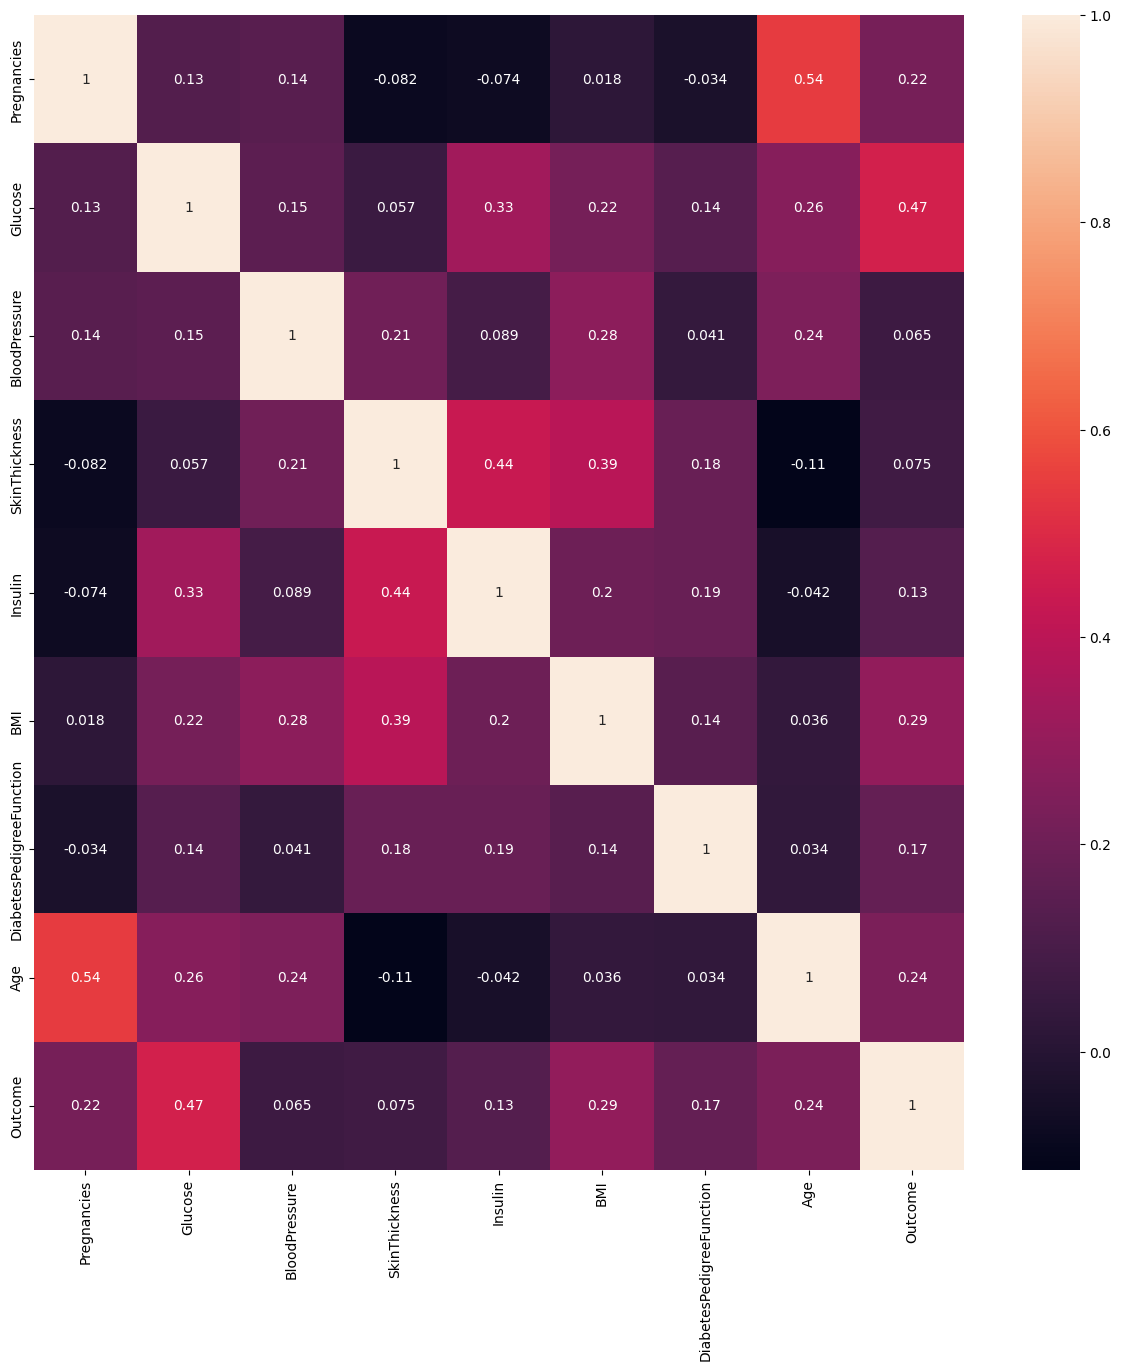

In [6]:
fig=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Outcome', ylabel='BMI'>

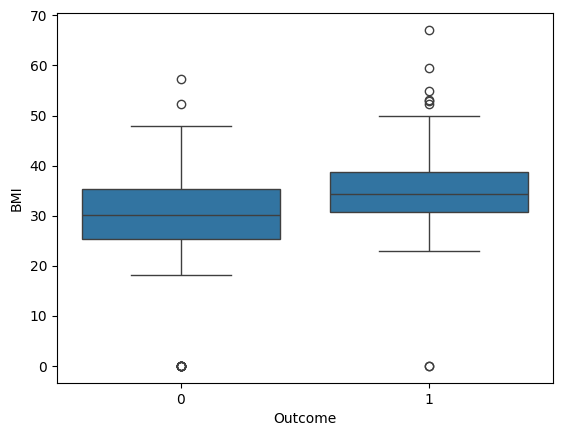

In [7]:
sns.boxplot(data=df,x="Outcome",y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

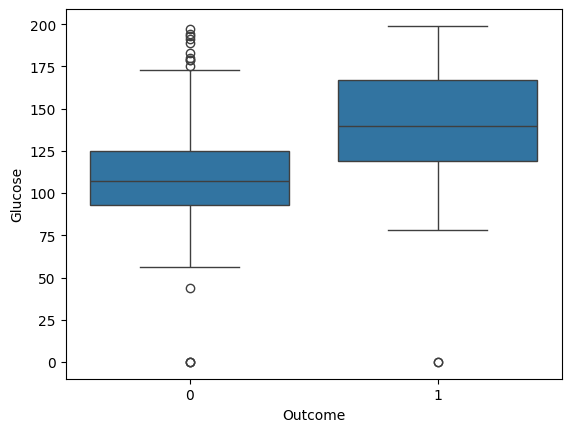

In [8]:
sns.boxplot(data=df,x="Outcome",y="Glucose")

<Axes: xlabel='Outcome', ylabel='Age'>

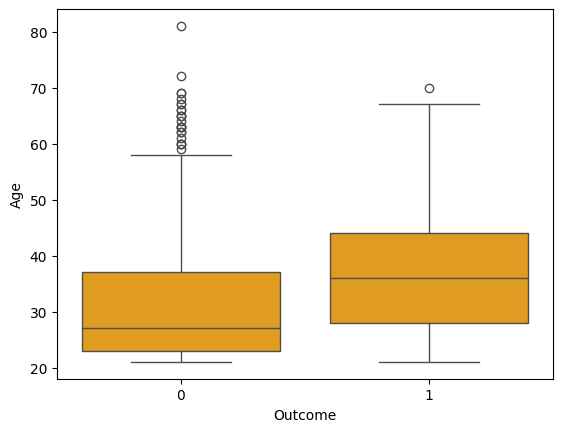

In [9]:
sns.boxplot(data=df,x="Outcome",y="Age",color="orange")

<Axes: xlabel='Pregnancies', ylabel='Age'>

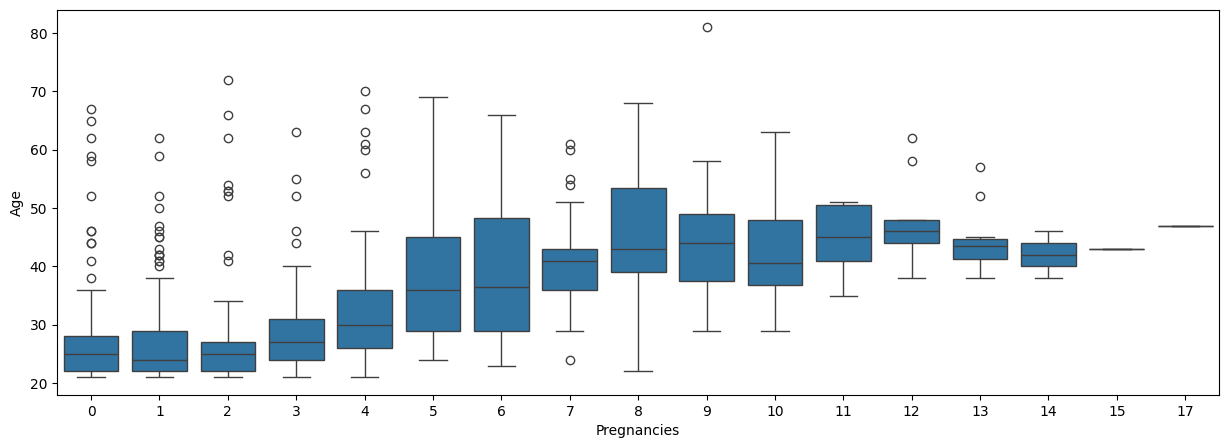

In [10]:
fig=plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x="Pregnancies",y="Age")

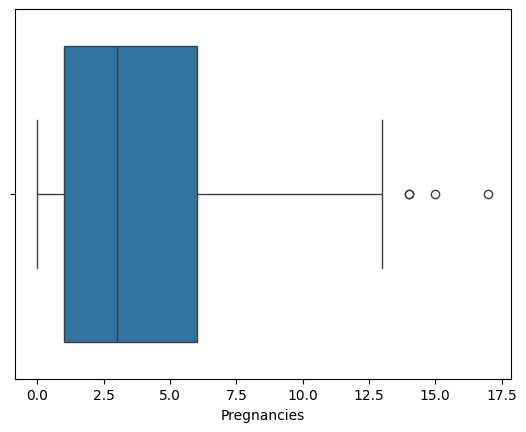

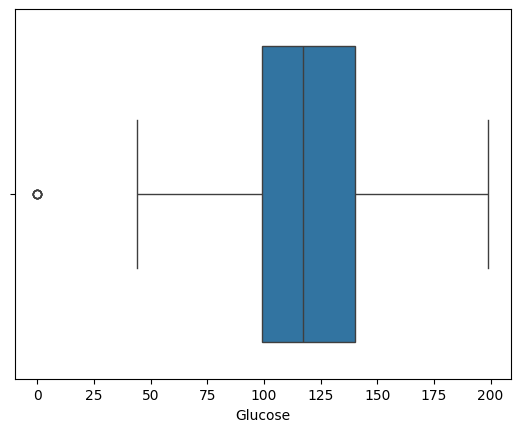

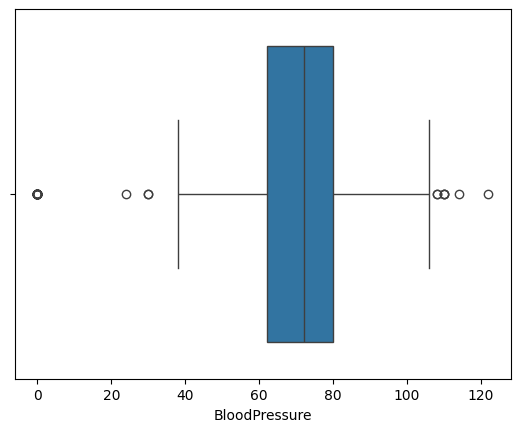

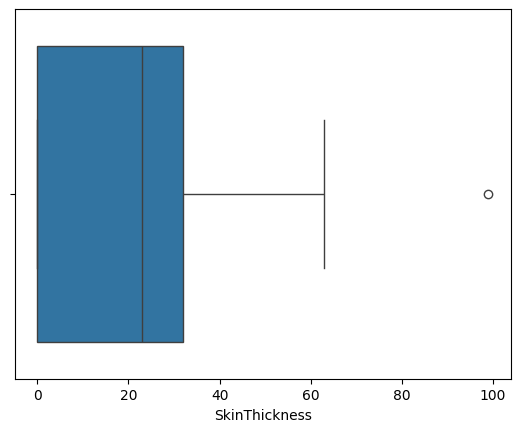

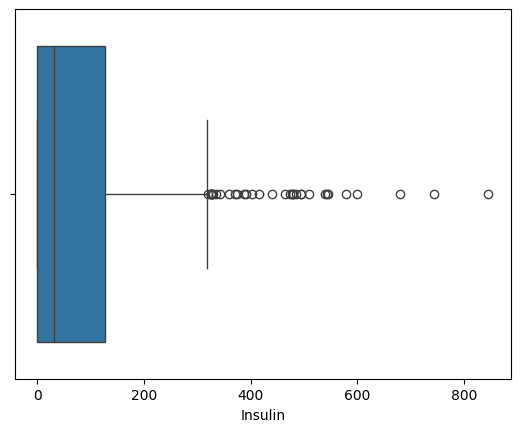

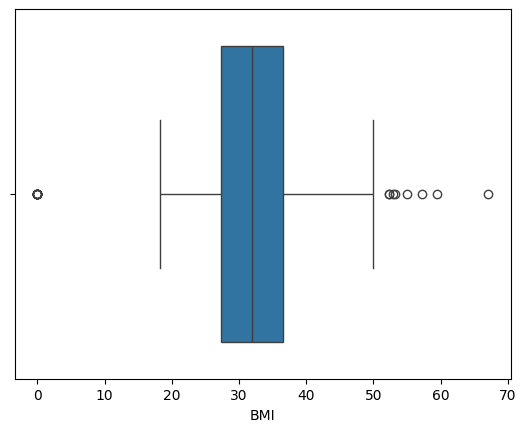

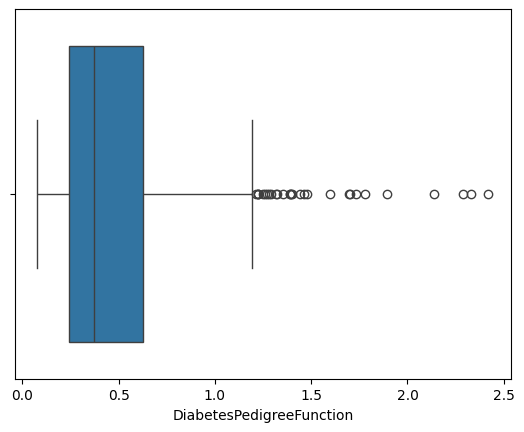

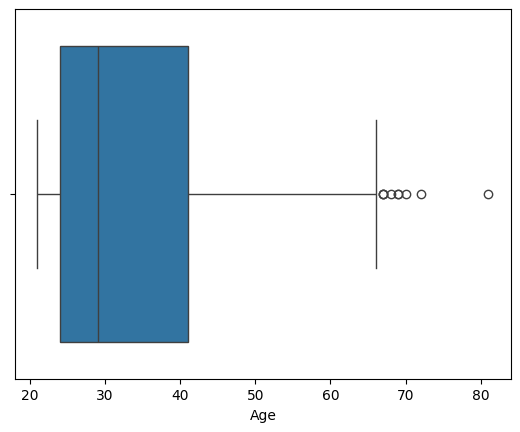

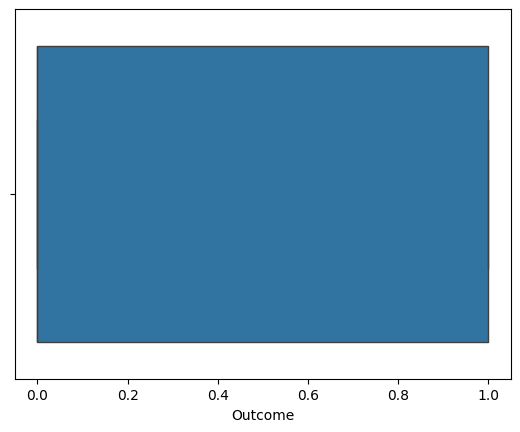

In [11]:
columns=df.columns
for col in columns:
    sns.boxplot(data=df,x=col)
    plt.show()

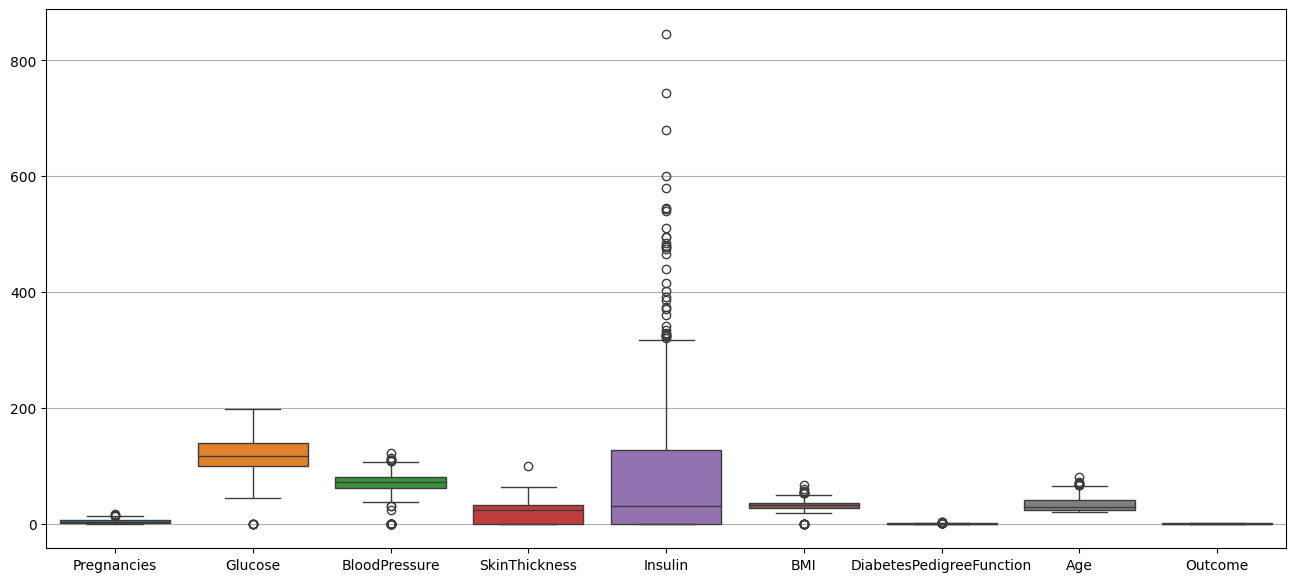

In [14]:
fig=plt.subplots(figsize=(16,7))
plt.grid()
sns.boxplot(data=df)
plt.savefig("BoxPlot.png",dpi=300)

In [13]:
# columns=df.columns
# for col in columns:
#     sns.regplot(data=df,y=col,x=df["Outcome"])
#     plt.show()

In [14]:
scale=MinMaxScaler()
arr=np.array(df["Insulin"])
arr.resize(768,1)
arr.shape
copy=df.copy()
df["Insulin"]=scale.fit_transform(arr)
df["Insulin"]

0      0.000000
1      0.000000
2      0.000000
3      0.111111
4      0.198582
         ...   
763    0.212766
764    0.000000
765    0.132388
766    0.000000
767    0.000000
Name: Insulin, Length: 768, dtype: float64

In [26]:
Outcome=df["Outcome"]
data=df.drop(["Outcome"],axis=1)

In [27]:
poly=PolynomialFeatures(degree=2,interaction_only=True)
poly.fit_transform(data)

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 2.10672e+01,
        1.68000e+03, 3.13500e+01],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 9.33660e+00,
        8.24600e+02, 1.08810e+01],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 1.56576e+01,
        7.45600e+02, 2.15040e+01],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.41900e+00,
        7.86000e+02, 7.35000e+00],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.05049e+01,
        1.41470e+03, 1.64030e+01],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.57600e+00,
        6.99200e+02, 7.24500e+00]])

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(data,Outcome,test_size=0.2,shuffle=True)
X_test.shape

(154, 8)

In [44]:
model=LogisticRegression(max_iter=200)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [45]:
y_pred=model.predict(X_test)

<Axes: >

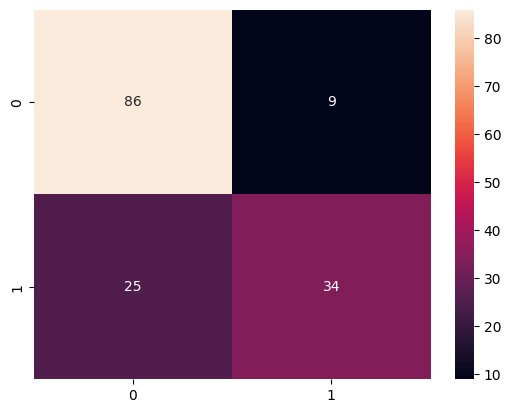

In [46]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [47]:
print(f"f1_score: {f1_score(Y_test,y_pred)}")
print(f"Accuracy_score: {accuracy_score(Y_test,y_pred)}")

f1_score: 0.6666666666666666
Accuracy_score: 0.7792207792207793


In [48]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        95
           1       0.79      0.58      0.67        59

    accuracy                           0.78       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [23]:
y_pred_proba=model.predict_proba(X_test)
# y_pred_proba
# Y_test.shape

In [24]:
auc=roc_auc_score(Y_test,y_pred_proba[:,1:])
fpr,tpr,threshold=roc_curve(Y_test,y_pred_proba[:,1:])

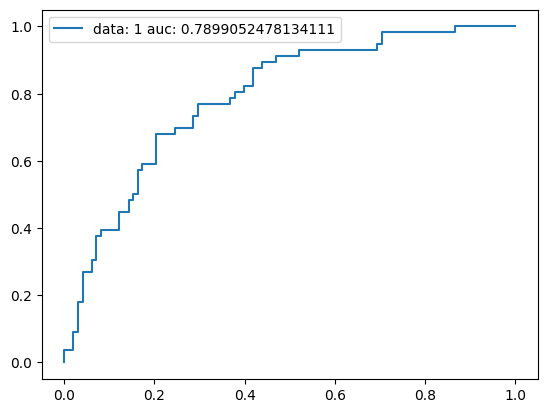

In [25]:
plt.plot(fpr,tpr,label=f"data: 1 auc: {auc}")
plt.legend()